In [1]:
pip install pandas nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

# Load the data
file_path = '1429_1.csv'  # File path to the uploaded spreadsheet
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())



                     id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  84

C:\Users\HP\AppData\Local\Temp\ipykernel_17644\2329720486.py:5: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [7]:


# Display only 5 columns (replace column names with your actual column names or use column indices)
data_subset = data[['id', 'name', 'brand', 'categories', 'reviews.text']]

# Show the first few rows of the subset (you can specify the number of rows if you want more)
data_subset.head()


,id,name,brand,categories,reviews.text
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",This product so far has not disappointed. My c...
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",great for beginner or experienced person. Boug...
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Inexpensive tablet for him to use and learn on...
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",I've had my Fire HD 8 two weeks now and I love...
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",I bought this for my grand daughter when she c...


In [15]:
# TEXT CLEANING
# Removing special characters and numbers
import re

def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^a-zA-Z\s]', '', text)  
    else:
        text = ''  # Handle non-string values
    return text

data['cleaned_text'] = data['reviews.text'].apply(clean_text)


In [14]:
data[['reviews.text', 'cleaned_text']]

,reviews.text,cleaned_text
0,This product so far has not disappointed. My c...,This product so far has not disappointed My ch...
1,great for beginner or experienced person. Boug...,great for beginner or experienced person Bough...
2,Inexpensive tablet for him to use and learn on...,Inexpensive tablet for him to use and learn on...
3,I've had my Fire HD 8 two weeks now and I love...,Ive had my Fire HD two weeks now and I love i...
4,I bought this for my grand daughter when she c...,I bought this for my grand daughter when she c...
...,...,...
34655,This is not appreciably faster than any other ...,This is not appreciably faster than any other ...
34656,Amazon should include this charger with the Ki...,Amazon should include this charger with the Ki...
34657,Love my Kindle Fire but I am really disappoint...,Love my Kindle Fire but I am really disappoint...
34658,I was surprised to find it did not come with a...,I was surprised to find it did not come with a...


In [18]:
# LOWERCASING
data['cleaned_text'] = data['cleaned_text'].str.lower()
data[['reviews.text', 'cleaned_text']]

,reviews.text,cleaned_text
0,This product so far has not disappointed. My c...,this product so far has not disappointed my ch...
1,great for beginner or experienced person. Boug...,great for beginner or experienced person bough...
2,Inexpensive tablet for him to use and learn on...,inexpensive tablet for him to use and learn on...
3,I've had my Fire HD 8 two weeks now and I love...,ive had my fire hd two weeks now and i love i...
4,I bought this for my grand daughter when she c...,i bought this for my grand daughter when she c...
...,...,...
34655,This is not appreciably faster than any other ...,this is not appreciably faster than any other ...
34656,Amazon should include this charger with the Ki...,amazon should include this charger with the ki...
34657,Love my Kindle Fire but I am really disappoint...,love my kindle fire but i am really disappoint...
34658,I was surprised to find it did not come with a...,i was surprised to find it did not come with a...


In [22]:
# REMOVING STOP WORDS

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

data['cleaned_text'] = data['cleaned_text'].apply(remove_stopwords)
data[['reviews.text', 'cleaned_text']]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviews.text,cleaned_text
0,This product so far has not disappointed. My c...,product far disappointed children love use lik...
1,great for beginner or experienced person. Boug...,great beginner experienced person bought gift ...
2,Inexpensive tablet for him to use and learn on...,inexpensive tablet use learn step nabi thrille...
3,I've had my Fire HD 8 two weeks now and I love...,ive fire hd two weeks love tablet great valuew...
4,I bought this for my grand daughter when she c...,bought grand daughter comes visit set user ent...
...,...,...
34655,This is not appreciably faster than any other ...,appreciably faster higher amp charger used kin...
34656,Amazon should include this charger with the Ki...,amazon include charger kindle fact theyre char...
34657,Love my Kindle Fire but I am really disappoint...,love kindle fire really disappointed kindle po...
34658,I was surprised to find it did not come with a...,surprised find come type charging cords purcha...


In [25]:
# TOKENIZATION
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Tokenize the text
data['tokens'] = data['cleaned_text'].apply(word_tokenize)
print(data['tokens'].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [product, far, disappointed, children, love, u...
1    [great, beginner, experienced, person, bought,...
2    [inexpensive, tablet, use, learn, step, nabi, ...
3    [ive, fire, hd, two, weeks, love, tablet, grea...
4    [bought, grand, daughter, comes, visit, set, u...
Name: tokens, dtype: object


In [30]:
# STEMMING

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Function to stem words
def stem_words(tokens):
    return [stemmer.stem(word) for word in tokens]

data['stemmed_text'] = data['tokens'].apply(stem_words)


In [29]:
data.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,cleaned_text,tokens,stemmed_text
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter,product far disappointed children love use lik...,"[product, far, disappointed, children, love, u...","[product, far, disappoint, children, love, use..."
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman,great beginner experienced person bought gift ...,"[great, beginner, experienced, person, bought,...","[great, beginn, experienc, person, bought, gif..."
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ,inexpensive tablet use learn step nabi thrille...,"[inexpensive, tablet, use, learn, step, nabi, ...","[inexpens, tablet, use, learn, step, nabi, thr..."
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks,ive fire hd two weeks love tablet great valuew...,"[ive, fire, hd, two, weeks, love, tablet, grea...","[ive, fire, hd, two, week, love, tablet, great..."
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42,bought grand daughter comes visit set user ent...,"[bought, grand, daughter, comes, visit, set, u...","[bought, grand, daughter, come, visit, set, us..."


In [32]:
#CLEANING THE MISSING VALUES

missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               6
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            7
cleaned_text                0
tokens                      0
stemmed_text                0
dtype: int64


In [35]:
data = data.dropna(subset=['name', 'asins', 'reviews.text'])
missing_values_after = data.isnull().sum()
print("\nMissing values after handling:\n", missing_values_after)


Missing values after handling:
 id                          0
name                        0
asins                       0
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               27
reviews.dateAdded        8917
reviews.dateSeen            0
reviews.didPurchase     27896
reviews.doRecommend       488
reviews.id              27896
reviews.numHelpful        455
reviews.rating             32
reviews.sourceURLs          0
reviews.text                0
reviews.title               4
reviews.userCity        27897
reviews.userProvince    27897
reviews.username            6
cleaned_text                0
tokens                      0
stemmed_text                0
dtype: int64


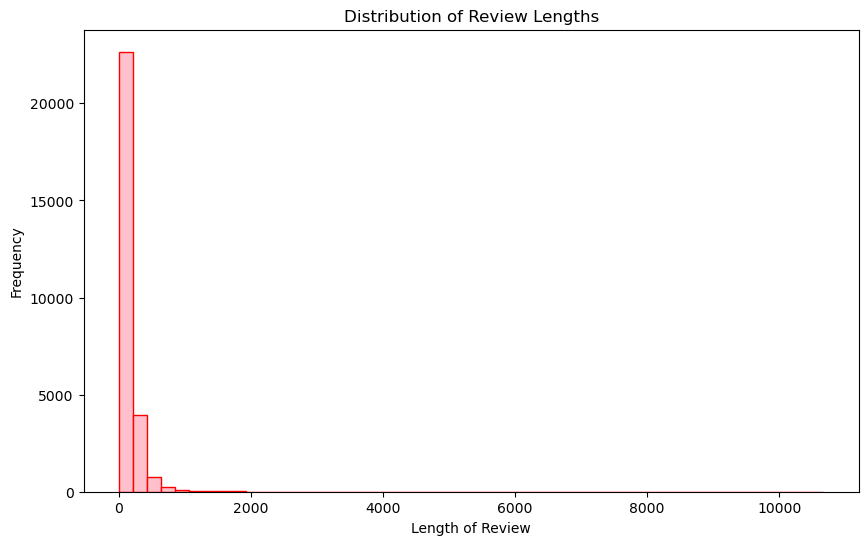

In [41]:
# EXPLORATORY DATA ANALYSIS
# Analyzing the distribution of review lengths

import matplotlib.pyplot as plt

# Calculate the length of each review
data['review_length'] = data['reviews.text'].apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
plt.hist(data['review_length'], bins=50, color='pink', edgecolor='red')
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()


In [46]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable


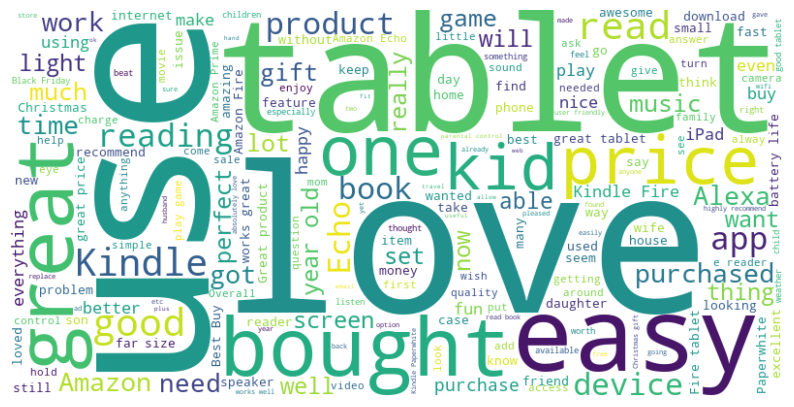

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single text
all_reviews = ' '.join(data['reviews.text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [55]:
# Sentiment Labelling
# Assuming 'reviews.rating' is the column with ratings in the dataset

# Define a function to label sentiments
def label_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to create a new column 'sentiment'
data['sentiment'] = data['reviews.rating'].apply(label_sentiment)

# Display the first few rows to check the new 'sentiment' column
print(data[['reviews.rating', 'sentiment']].head())

   reviews.rating sentiment
0             5.0  positive
1             5.0  positive
2             5.0  positive
3             4.0  positive
4             5.0  positive


In [57]:
# Display rows 224 to 228
data.iloc[224:228]

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,cleaned_text,tokens,stemmed_text,review_length,sentiment
224,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2016-12-30T00:00:00.000Z,2017-05-21T05:59:48Z,"2017-04-30T00:43:00.000Z,2017-06-07T09:03:00.000Z",...,The price is low because Amazon uses their add...,Price is great but limited to Amazon Apps,NaN,NaN,Dave,price low amazon uses adds subsidize price act...,"[price, low, amazon, uses, adds, subsidize, pr...","[price, low, amazon, use, add, subsid, price, ...",453,positive
225,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2016-12-30T00:00:00.000Z,2017-05-21T05:59:48Z,"2017-04-30T00:43:00.000Z,2017-06-07T09:03:00.000Z",...,Screen is very clear and battery last a long t...,Awesome tablet,NaN,NaN,HondaVtec,screen clear battery last long time good subst...,"[screen, clear, battery, last, long, time, goo...","[screen, clear, batteri, last, long, time, goo...",97,positive
226,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-03T00:00:00.000Z,2017-05-21T05:59:34Z,"2017-04-30T00:43:00.000Z,2017-06-07T09:03:00.000Z",...,The tablet works fine. It is responsive with g...,Works well but too tied to Amazon.,NaN,NaN,AZ23b,tablet works fine responsive good resolution t...,"[tablet, works, fine, responsive, good, resolu...","[tablet, work, fine, respons, good, resolut, t...",219,neutral
227,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-03T00:00:00.000Z,2017-05-21T05:59:34Z,"2017-04-30T00:43:00.000Z,2017-06-07T09:03:00.000Z",...,A Great value for the money you can save inste...,Great Tablet for the casual user,NaN,NaN,hotleggs,great value money save instead ipad apple,"[great, value, money, save, instead, ipad, apple]","[great, valu, money, save, instead, ipad, appl]",70,positive


In [60]:
# SENTIMENT ANALYSIS USING PRE-TRAINED MODELS (VADER & TEXTBLOB)
# install 'nltk' and download VADER lexicon

!pip install nltk

import nltk
nltk.download('vader_lexicon')


Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


True

In [61]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Function to get VADER sentiment scores
def vader_sentiment(review):
    return sid.polarity_scores(review)

# Apply the function to get sentiment scores
data['vader_scores'] = data['reviews.text'].apply(vader_sentiment)

# Extract the compound score as a summary of the sentiment
data['vader_compound'] = data['vader_scores'].apply(lambda score_dict: score_dict['compound'])

# Display the first few rows with VADER sentiment scores
print(data[['reviews.text', 'vader_scores', 'vader_compound']].head())


                                        reviews.text  \
0  This product so far has not disappointed. My c...   
1  great for beginner or experienced person. Boug...   
2  Inexpensive tablet for him to use and learn on...   
3  I've had my Fire HD 8 two weeks now and I love...   
4  I bought this for my grand daughter when she c...   

                                        vader_scores  vader_compound  
0  {'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'comp...          0.9194  
1  {'neg': 0.0, 'neu': 0.483, 'pos': 0.517, 'comp...          0.8934  
2  {'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'comp...          0.4404  
3  {'neg': 0.036, 'neu': 0.683, 'pos': 0.281, 'co...          0.9884  
4  {'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'comp...          0.7876  


NameError: name 'data' is not defined